### Imports

In [8]:
import os
import tensorflow as tf
import keras
import numpy as np
import pandas as pd
import cv2 as cv
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 8), dpi=100)

from keras.callbacks import ModelCheckpoint

### Load train data

In [9]:
(y_tr, _), (y_te, _) = tf.keras.datasets.cifar10.load_data()
y_tr = y_tr.astype('float32') / 255
y_te = y_te.astype('float32') / 255
x_tr = np.expand_dims([cv.cvtColor(x, cv.COLOR_RGB2GRAY) for x in y_tr], axis=3)
x_te = np.expand_dims([cv.cvtColor(x, cv.COLOR_RGB2GRAY) for x in y_te], axis=3)

### Model structure

In [10]:
input_ = keras.layers.Input(shape=(32,32, 1))
x = input_

filters = [32, 64, 128]

for f in filters:
  x = keras.layers.Conv2D(f, (3, 3), padding='same', activation='relu')(x)
  x = keras.layers.MaxPooling2D((2, 2), padding='same')(x)
  x = keras.layers.BatchNormalization()(x)

encoder = x

for f in filters:
  x = keras.layers.Conv2D(f, (3, 3), padding='same', activation='relu')(x)
  x = keras.layers.UpSampling2D((2, 2))(x)
  x = keras.layers.BatchNormalization()(x)

decoder = keras.layers.Conv2D(3, (3, 3), padding='same', activation='sigmoid')(x)

autoencoder = keras.models.Model(inputs=input_, outputs=decoder)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 32, 32, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                                  
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 64)          0     

In [12]:
tf.keras.utils.plot_model(
  autoencoder,
  to_file='model.png',
  show_shapes=True,
  show_layer_names=True,
  show_dtype=True,
  dpi=100)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [13]:
autoencoder.compile(
  optimizer ='adam',
  loss='mse')

hist = autoencoder.fit(
  x_tr,
  y_tr,
  epochs=20,
  validation_data=(x_te,y_te),
  callbacks=[
    ModelCheckpoint("autoencoder.h5",save_best_only=True)])


Epoch 1/20

1563/1563 [==============================] - ETA: 0s - loss: 0.0151

d:\PP\7sem\SNUM\projekt\.venv\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1563/1563 [==============================] - 99s 61ms/step - loss: 0.0151 - val_loss: 0.0121
Epoch 2/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.0108 - val_loss: 0.0098
Epoch 3/20
1563/1563 [==============================] - 94s 60ms/step - loss: 0.0099 - val_loss: 0.0112
Epoch 4/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 5/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 6/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 7/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.0086 - val_loss: 0.0103
Epoch 8/20
1563/1563 [==============================] - 95s 61ms/step - loss: 0.0086 - val_loss: 0.0090
Epoch 9/20
1563/1563 [==============================] - 96s 62ms/step - loss: 0.0084 - val_loss: 0.0079
Epoch 10/20
1563/1563 [==============================] - 96s 61ms/step - lo

In [14]:
pd.DataFrame(hist.history)

,loss,val_loss
0,0.015098,0.012081
1,0.010811,0.009773
2,0.009945,0.011183
3,0.009439,0.009249
4,0.009133,0.009184
5,0.008875,0.008553
6,0.008635,0.010340
7,0.008569,0.008959
8,0.008395,0.007881
9,0.008293,0.008393


In [ ]:
# autoencoder = keras.models.load_model('model.h5')

In [19]:
def plot_predict(x, Y):
  fig, (ax1, ax2) = plt.subplots(ncols=2)
  ax1.imshow(x.reshape(x.shape[0], x.shape[1]), cmap='gray')
  ax2.imshow(Y)
  ax1.set_xlabel('input')
  ax2.set_xlabel('predicted')

def predict_image(model, path):
  y = cv.cvtColor(cv.imread(path), cv.COLOR_BGR2RGB).astype('float32') / 255
  # y = cv.resize(y, (32, 32))
  x = cv.cvtColor(y, cv.COLOR_RGB2GRAY)
  print(x.shape)
  Y = model.predict(x.reshape(1, x.shape[0], x.shape[1], 1))[0]
  plot_predict(x, Y)

(607, 910)
1/1 [==============================] - 0s 430ms/step
(485, 728)
1/1 [==============================] - 0s 180ms/step
(684, 900)
1/1 [==============================] - 0s 303ms/step
(667, 1000)
1/1 [==============================] - 0s 320ms/step
(170, 296)
1/1 [==============================] - 0s 52ms/step
(183, 275)
1/1 [==============================] - 0s 52ms/step
(1237, 1980)
1/1 [==============================] - 1s 1s/step


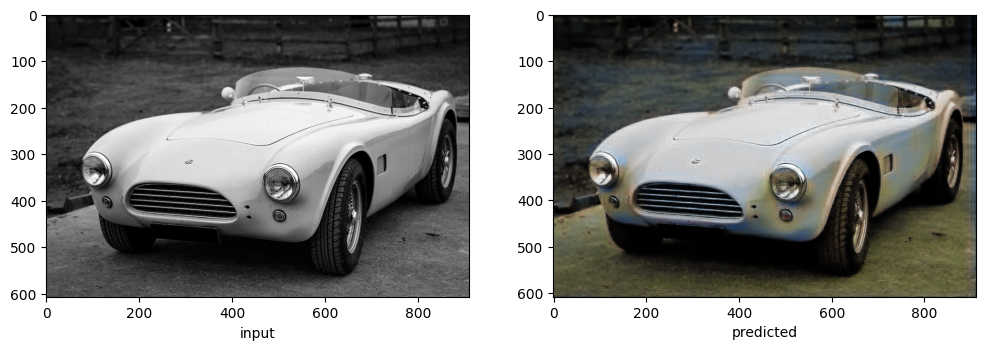

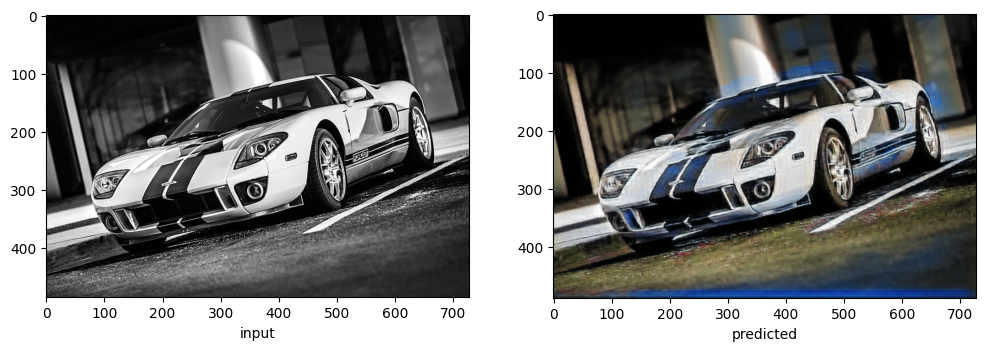

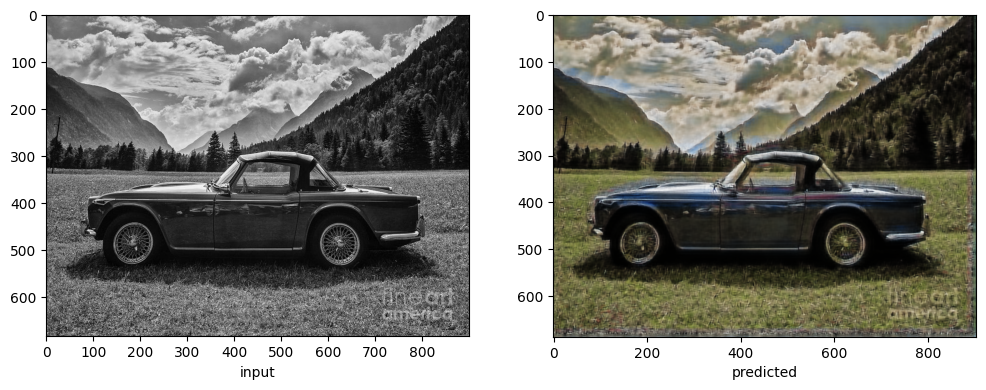

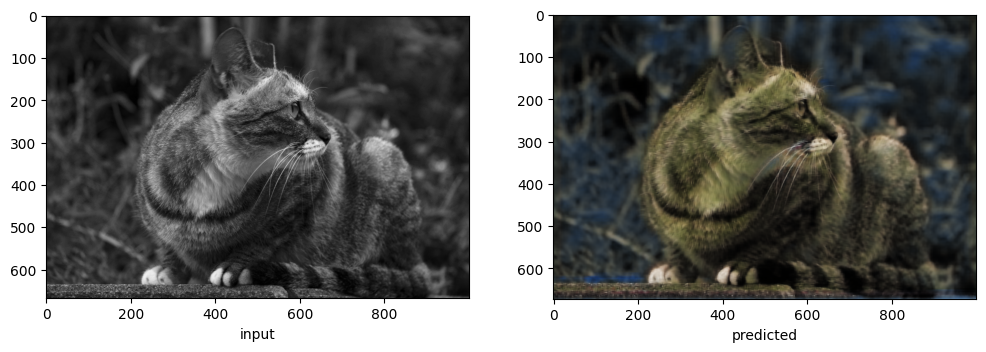

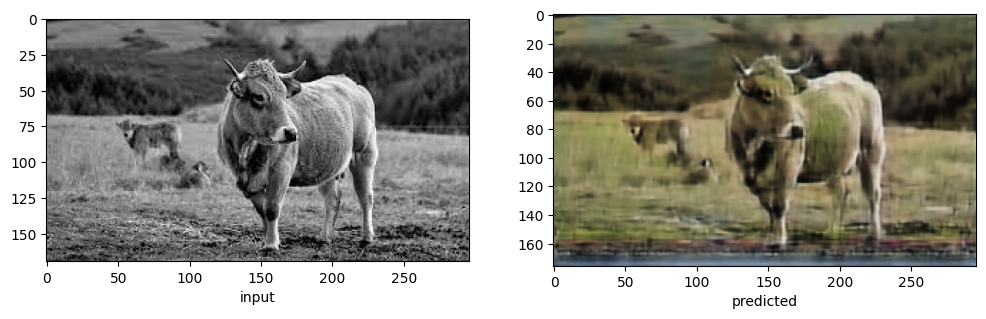

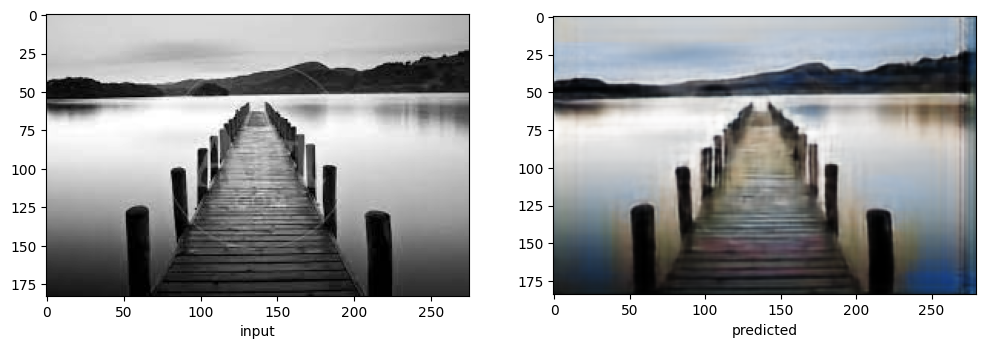

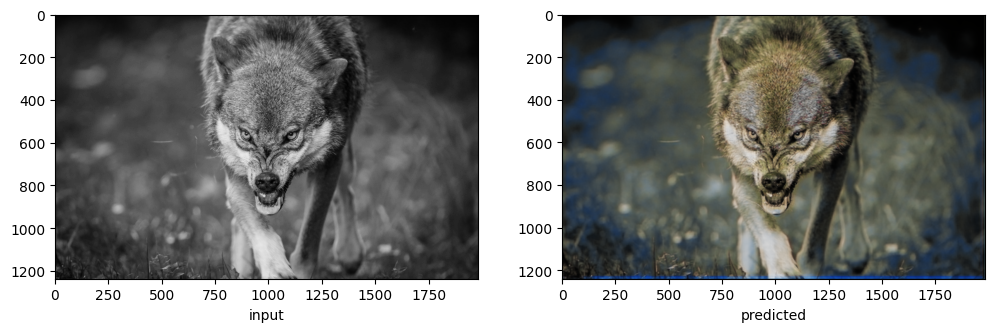

In [20]:
for file in os.listdir('images'):
  predict_image(autoencoder, os.path.join('images', file))